In [1]:
#importing libraries
import numpy as no
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
companies = pd.read_csv('insuranceData.csv')
#':. :-1' says take every row except for the last column
X = companies.iloc[:, :-1].values
# equal to the last row
y = companies.iloc[:, 4].values


In [3]:
companies.head()
#visual is a pandas output

,age,bmi,children,smoker,charges
0,19,27.900,0,yes,16884.92400
1,18,33.770,1,no,1725.55230
2,28,33.000,3,no,4449.46200
3,33,22.705,0,no,21984.47061
4,32,28.880,0,no,3866.85520


<AxesSubplot:>

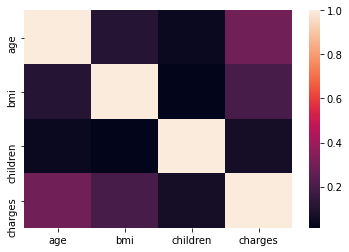

In [4]:
#data vis
#building the correlation matrix
sns.heatmap(companies.corr())

#lightest data has the highest correlation
#darkest has the least correlation

In [5]:
#encoding categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

labelencoder = LabelEncoder()

#changes state names to numbers so the code can read it
#':,' means we will look at all the different rows
#' 3' only editing the third row
X[:, 3] = labelencoder.fit_transform(X[:, 3])

#
onehotencoder = OneHotEncoder(categories = 'auto')
#preps the data so its just a row of numbers
X = onehotencoder.fit_transform(X).toarray()
print(X)

[[0. 1. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [1. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [6]:
#avoiding dummy variable trap
X = X[:, 1:]

In [7]:
#splitting the dataset into the training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [8]:
#fitting multiple linear regression to the training set
from sklearn.linear_model import LinearRegression
model_fit = LinearRegression()
model_fit.fit(X_train, y_train)

LinearRegression()

In [9]:
#splitting the dataset into the training set and test set
from sklearn.model_selection import train_test_split
#4 variables
#x = data going in (r&d, )
#y = data coming out (profit, )
#'train_test_split()' = only testing .2 of the data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 0)

In [10]:
#fitting multiple linear regression to the training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
#creates the whole llinear regression model
regressor.fit(X_train, y_train)

LinearRegression()

In [11]:
#predicting the test set results
y_pred = regressor.predict(X_test)
y_pred

array([ 1.28000000e+04, -3.73867859e+16,  4.04480000e+04,  1.42080000e+04,
       -4.95792793e+17,  2.30400000e+03,  1.40800000e+03,  1.72800000e+04,
        7.55200000e+03,  7.55200000e+03,  5.09375819e+17,  1.61280000e+04,
        4.73600000e+03,  4.73600000e+03,  3.00800000e+04, -1.39263856e+16,
        1.35680000e+04,  1.60000000e+04,  5.76000000e+03,  1.45745725e+16,
        2.98240000e+04,  2.22720000e+04,  8.06400000e+03,  3.34080000e+04,
        2.61861731e+16,  1.40800000e+03, -3.84000000e+03,  7.29600000e+03,
        4.09600000e+03,  1.44640000e+04,  8.96000000e+02,  3.87840000e+04,
        1.63840000e+04,  1.95184605e+18, -6.33000584e+17,  4.48000000e+03,
        1.74080000e+04,  2.63560528e+16,  3.16160000e+04, -1.15200000e+03,
        4.73600000e+03, -5.50400000e+03,  2.64960000e+04,  3.81440000e+04,
        2.50880000e+04,  3.71200000e+03,  1.39520000e+04,  4.99200000e+03,
        1.94481240e+17,  5.37600000e+03,  7.22533933e+15,  3.20000000e+03,
        3.80160000e+04,  

In [12]:
#calculating the coefficients
print(regressor.coef_)

[ 1.74525339e+03 -5.97300222e+02  7.53548145e+02  3.08607224e+03
  3.77338819e+03  5.45490270e+03  1.50152798e+03  3.50314380e+03
  5.20539495e+03  3.89318060e+03  2.51476776e+03  3.78290825e+03
  3.55352395e+03  1.10785272e+03  5.72070122e+03  4.42398788e+03
  3.30138486e+03  5.63697840e+03  6.08132704e+03  3.82148087e+03
  3.65429704e+03  2.87070239e+03  4.23361109e+03  2.18527002e+03
  3.53927904e+03  7.14942406e+03  9.40667574e+03  7.86869668e+03
  8.21026782e+03  7.31539496e+03  7.74493504e+03  1.16785300e+04
  7.35351983e+03  9.21334752e+03  1.05064745e+04  1.23991910e+04
  1.04793619e+04  1.01921735e+04  1.01278821e+04  8.99581486e+03
  1.24102180e+04  1.23223609e+04  1.43557664e+04  1.11810089e+04
  1.20466278e+04  1.45184763e+04 -2.63560528e+16 -2.63560528e+16
 -2.63560528e+16 -2.63560528e+16 -2.63560528e+16 -2.63560528e+16
 -2.63560528e+16 -2.63560528e+16 -2.63560528e+16 -2.63560528e+16
 -2.63560528e+16 -2.63560528e+16 -5.22148846e+17 -2.63560528e+16
 -2.63560528e+16 -2.63560

In [13]:
#calculating the intercept
print(regressor.intercept_)

8.664452427981805e+17


In [14]:
#successful linear regression model
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

-3.322249822564123e+26